<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana2/Notebooks%20/Distribuci%C3%B3n_Multinomial%2C_momentos%2C_covarianza_y_correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import multinomial
from scipy.stats import kurtosis, skew  # curtosis y asimetría

In [19]:
# resultados de preferncias electorales de grupos de m cantidad de personas

m = 10
N = 500
df = pd.DataFrame(multinomial.rvs(n = m, p=[0.2, 0.4, 0.4],  size = N),
                  columns = ['A', 'B','C'])
df

,A,B,C
0,2,1,7
1,2,4,4
2,0,5,5
3,3,2,5
4,1,8,1
...,...,...,...
495,1,3,6
496,4,3,3
497,3,4,3
498,1,6,3


# Media

In [21]:
def media(df, col):
  N = len(df)
  sumatoria = df[col].sum()
  return sumatoria/N

media(df, 'A')

2.018

# Varianza

$\mathrm{Var}(X) =\dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i-\bar{x})^2$

In [22]:
def varianza(df, col):
  n = len(df)
  col_media =  media(df, col)
  sumatoria = ((df[col] - col_media)**2).sum()
  return sumatoria/n
varianza(df, 'A')

1.5456760000000005

# Histógramas

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: >]], dtype=object)

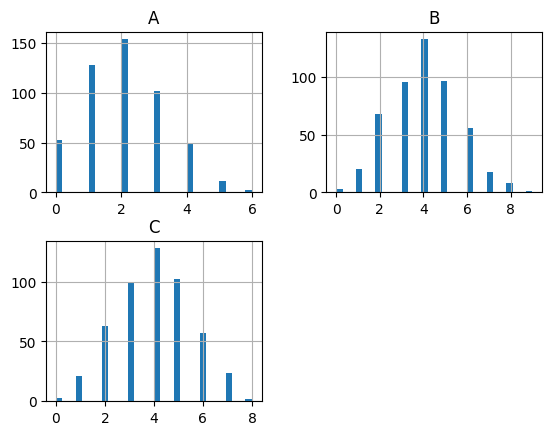

In [ ]:
df.hist(bins=30)

In [ ]:
kurtosis(df['A'] ), skew(df['A'])

(-0.27472012648652067, 0.3468490297363043)

In [ ]:
kurtosis(df['B']), skew(df['B'])

(-0.1319476578429457, 0.16835533754625093)

In [ ]:
kurtosis(df['C']), skew(df['C'])

(-0.4127318597743317, 0.003370612551410649)

# Covarianza

$\mathrm{Cov}(X, Y) =\dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i-\bar{x}) (x_i-\bar{y})$

In [25]:
def covarianza(df, col1 = str, col2=str):
  '''Covarianza entre dos columnas de un DataFrame'''
  mean_1 = media(df, col1)
  mean_2 = media(df, col2)
  sumatoria = ((df[col1]  - mean_1) * (df[col2] - mean_2)).sum()
  return sumatoria/len(df)
covarianza(df, 'A', 'C')

-0.70782

In [24]:
# Matriz de covarianza
df.cov()

,A,B,C
A,1.548774,-0.839535,-0.709238
B,-0.839535,2.468874,-1.629339
C,-0.709238,-1.629339,2.338577


# Correlación

In [26]:
# la correlación se calcula dividiendo la covarianza entre dos variables entre el producto de sus desviaciones estándar

def correlacion(df , col1=str, col2=str):
  cov = covarianza(df, col1, col2)
  producto_desviaciones = np.sqrt(varianza(df, col1)) * np.sqrt(varianza(df,col2))
  return cov/producto_desviaciones

correlacion(df, 'A', 'C')

-0.3726683203627996

In [27]:
df.corr()

,A,B,C
A,1.000000,-0.429334,-0.372668
B,-0.429334,1.000000,-0.678088
C,-0.372668,-0.678088,1.000000
